In [9]:
from xbbg import blp
import pdblp
import workdays
import datetime
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 70)
# https://data.bloomberglp.com/labs/sites/2/2013/12/blpapi-developers-guide-1.38.pdf
# https://data.bloomberglp.com/professional/sites/10/2017/03/BLPAPI-Core-Developer-Guide.pdf

In [20]:
LS = ["ES","NQ","RTY","VG","TP","JGS","NZ","IFB","FFD","XU","TWT"]

T = [x + "A Index" for x in LS ]
df_BDP = blp.bdp(tickers=T, flds=['name','currency','exch_code','undl_spot_ticker']).loc[T,:]
display(df_BDP)


T = [i + "1 Index" for i in LS]
    
d_from = workdays.workday(datetime.datetime.today(), days=-260*2).strftime("%Y%m%d")
d_to = workdays.workday(datetime.datetime.today(), days=-1).strftime("%Y%m%d")
df = blp.bdh(T, ["px_open","px_last","px_volume"], d_from, d_to, Calendar="5D", Fill="P").reset_index()
# blp.bdh(T, ["px_open","px_last"], d_from, d_to, Calendar="5D", Fill="P").reset_index()
# blp.bdh(T, ["px_open","px_last"], d_from, d_to, Per="M").reset_index()
df = df[[df.columns[0][0]]+T]
df.columns = ["Date"] + [ l + x for l in LS for x in ["_open","_last","_volume"]]
df["Date"] = pd.to_datetime(df["Date"])
df

,name,currency,exch_code,undl_spot_ticker
ESA Index,S&P500 EMINI FUT Dec24,USD,CME,SPX
NQA Index,NASDAQ 100 E-MINI Dec24,USD,CME,NDX
RTYA Index,E-Mini Russ 2000 Dec24,USD,CME,RTY
VGA Index,EURO STOXX 50 Dec24,EUR,EUX,SX5E
TPA Index,TOPIX INDX FUTR Dec24,JPY,OSE,TPX
JGSA Index,IFSC NIFTY 50 FUT Nov24,USD,NGC,NIFTY
NZA Index,Nifty 50 Nov24,INR,NSE,NIFTY
IFBA Index,CSI 300 IDX FUTUR Dec24,CNY,CFF,SHSN300
FFDA Index,CSI500 IDX Future Dec24,CNY,CFF,SH000905
XUA Index,FTSE CHINA A50 Nov24,USD,SGX,XIN9I


,Date,ES_open,ES_last,ES_volume,NQ_open,NQ_last,NQ_volume,RTY_open,RTY_last,RTY_volume,VG_open,VG_last,VG_volume,TP_open,TP_last,TP_volume,JGS_open,JGS_last,JGS_volume,NZ_open,NZ_last,NZ_volume,IFB_open,IFB_last,IFB_volume,FFD_open,FFD_last,FFD_volume,XU_open,XU_last,XU_volume,TWT_open,TWT_last,TWT_volume
0,2022-11-21,4323.21,4307.43,1178421.0,12923.65,12774.83,477970.0,2004.42,1993.71,124042.0,3966.60,3955.48,577420.0,1882.3,1887.5,37870.0,20973.00,20900.64,5430.0,20946.70,20816.37,126219.0,3690.12,3689.73,76464.0,5481.82,5511.30,60840.0,12068.1,11898.4,269295.0,1241.04,1238.60,43068.0
1,2022-11-22,4307.16,4364.29,1161999.0,12774.83,12958.38,531087.0,1992.96,2016.00,136678.0,3966.60,3976.72,674310.0,1887.0,1908.6,58677.0,20941.99,20959.21,5947.0,20849.66,20917.97,114974.0,3695.99,3684.06,84648.0,5505.26,5438.66,69925.0,11896.4,12018.1,257801.0,1237.63,1242.01,47872.0
2,2022-11-23,4364.02,4389.05,1281153.0,12944.05,13077.71,474645.0,2016.00,2018.81,156991.0,3993.91,3994.92,692082.0,1887.0,1908.6,58677.0,21080.96,20983.91,5329.0,21002.65,20924.55,132279.0,3681.52,3697.16,79987.0,5442.22,5443.64,68440.0,12024.0,11994.5,314964.0,1241.28,1252.73,59219.0
3,2022-11-24,4364.02,4389.05,1281153.0,12944.05,13077.71,474645.0,2016.00,2018.81,156991.0,3994.92,4008.07,546710.0,1906.6,1930.6,78621.0,21080.96,21328.38,5329.0,20963.97,21185.36,190026.0,3716.12,3680.15,70279.0,5468.14,5447.54,55072.0,11991.6,11917.0,412577.0,1251.02,1267.09,76175.0
4,2022-11-25,4395.31,4388.51,608795.0,13094.53,12989.52,252366.0,2021.73,2022.92,79453.0,4004.02,4006.05,623996.0,1930.1,1932.0,42513.0,21314.64,21355.84,5493.0,21191.10,21208.05,125828.0,3675.66,3701.07,77374.0,5437.78,5422.33,55320.0,11921.9,12010.2,693347.0,1266.12,1262.71,75379.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,2024-11-11,6030.00,6031.75,1069929.0,21249.75,21217.75,456006.0,2418.10,2448.50,169733.0,4831.00,4863.00,573720.0,2746.0,2741.0,35420.0,24133.00,24226.00,43000.0,24150.00,24226.30,237651.0,4080.00,4125.60,110171.0,6149.00,6248.40,72838.0,13640.0,13715.0,479540.0,1980.00,1965.75,52750.0
516,2024-11-12,6029.25,6013.00,1407120.0,21221.00,21189.50,511372.0,2447.50,2405.10,180937.0,4854.00,4757.00,1014078.0,2743.0,2743.5,44272.0,24225.00,23872.50,46750.0,24266.85,23959.60,210048.0,4133.40,4086.20,125160.0,6250.00,6180.40,84331.0,13722.0,13580.0,431726.0,1965.00,1910.50,60465.0
517,2024-11-13,6012.25,6016.00,1445258.0,21178.00,21159.50,533739.0,2405.80,2382.70,187234.0,4754.00,4741.00,839671.0,2745.0,2705.0,45437.0,23899.00,23666.50,59361.0,23889.00,23658.55,266439.0,4068.20,4113.60,102550.0,6149.00,6195.00,77789.0,13589.0,13710.0,309212.0,1912.25,1908.50,57409.0
518,2024-11-14,6017.75,5978.25,1538927.0,21167.00,21011.75,561950.0,2386.10,2349.60,185281.0,4757.00,4837.00,1046222.0,2707.0,2703.0,37493.0,23640.50,23665.50,50239.0,23649.00,23601.70,226912.0,4098.00,4059.20,105891.0,6170.80,6053.20,84085.0,13706.0,13527.0,314749.0,1910.25,1898.25,60464.0


In [21]:
def Plot(title="",c="" ,l="",axhline="",m="", ymin=None, ymax=None):
    fig, ax = plt.subplots(figsize=(6.5, 2))
    ax.plot(df["Date"], df[c], label=l, marker=m)
    ax.set_title(title, fontsize=10)
    if axhline != "":
        ax.axhline(y=axhline, color='gray', linestyle='--', linewidth=0.5)
    if l != "":
        ax.legend(loc='best')
    if ymin is not None and ymax is not None:
        ax.set_ylim(ymin, ymax)
    plt.tight_layout()
    plt.show()
    
def Plot2(title,c1,c2,l1="",l2="",m1="",m2="",axhline="",color2='tab:orange'): #Two-axis graph  
    fig, ax = plt.subplots(figsize=(6.5, 2))
    l1 = l1 or c1  # l1 = c1 if l1 == "" else l1
    l2 = l2 or c2
    ax.plot(df["Date"], df[c1], marker=m1, label=l1)
    ax.plot(df["Date"], df[c2], marker=m2, label=l2, color=color2)
    if axhline != "":
        ax.axhline(y=axhline, color='gray', linestyle='--', linewidth=0.5)
    ax.set_title(title, fontsize=10)
    ax.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
def PlotTW(title,c1,c2,l1="",l2=""): #Two-axis graph
    fig, ax = plt.subplots(figsize=(6.5, 2.3))
    l1 = l1 or c1  # l1 = c1 if l1 == "" else l1
    l2 = l2 or c2
    
    line1, = ax.plot(df["Date"], df[c1], label=l1)  # line1オブジェクトを取得
    ax.set_ylabel(l1)

    ax2 = ax.twinx()
    line2, = ax2.plot(df["Date"], df[c2], label=l2, color='lightsteelblue')  # line2オブジェクトを取得
    ax2.set_ylabel(l2)
    
    ax.set_title(title, fontsize=10)
    ax.legend(handles=[line1, line2], labels=[l1, l2], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

    plt.tight_layout()
    plt.show()

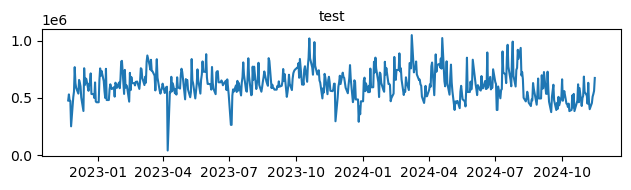

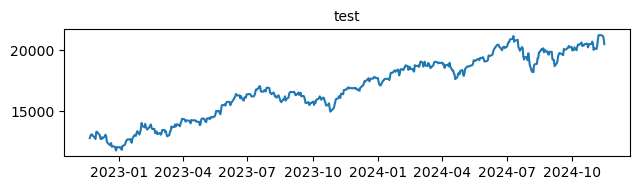

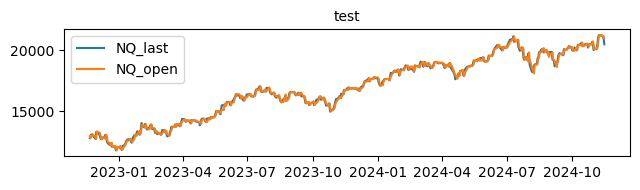

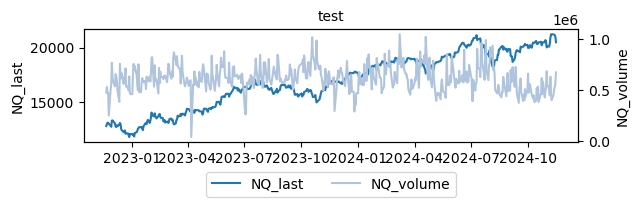

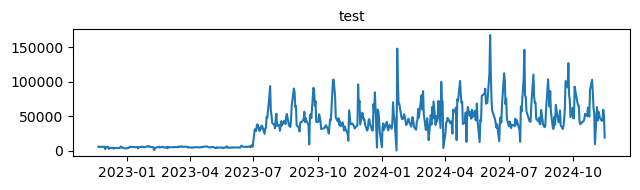

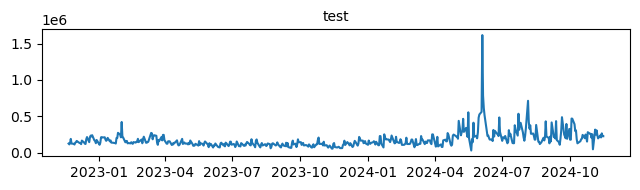

In [22]:
Plot("test","NQ_volume")
Plot("test","NQ_last")
Plot2("test","NQ_last","NQ_open")
PlotTW("test","NQ_last","NQ_volume")

Plot("test","JGS_volume")
Plot("test","NZ_volume")

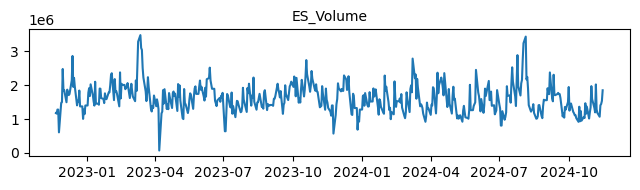

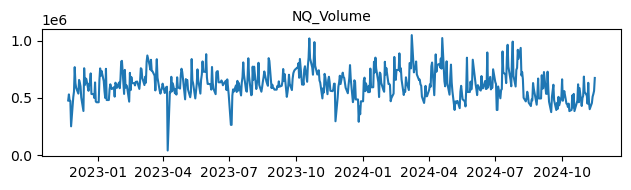

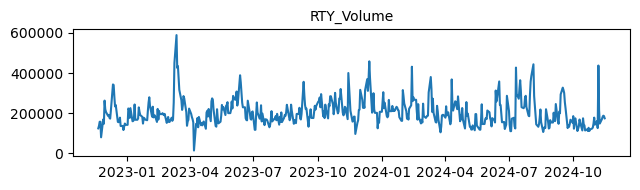

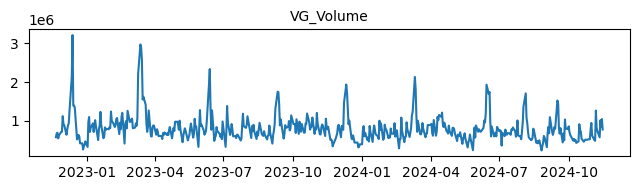

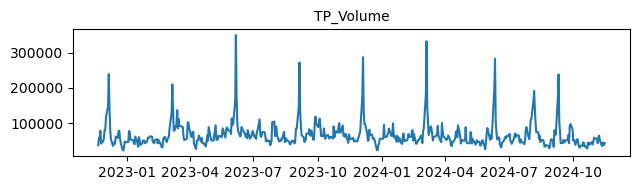

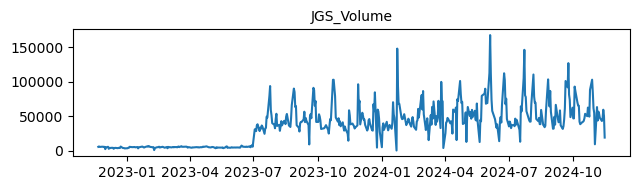

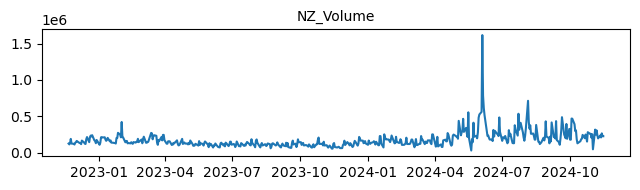

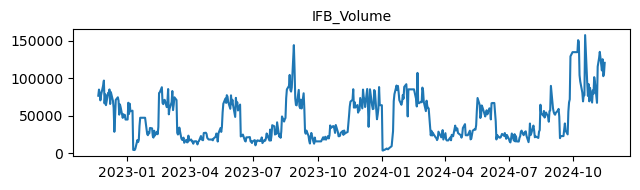

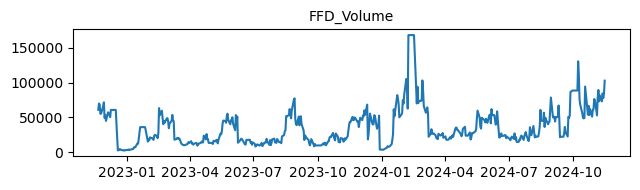

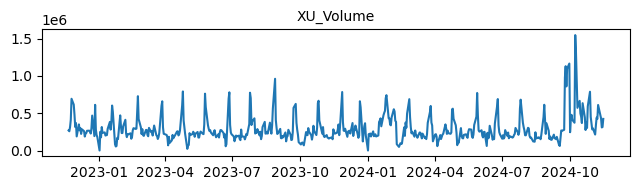

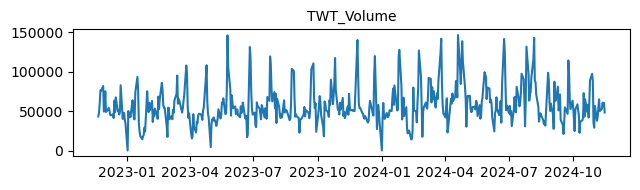

In [23]:
for i in LS:
    Plot(i+"_Volume",i+"_volume")